# Random Forest


In [30]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.metrics import mean_squared_error

# Data
# X_train_df = pd.read_csv('gold/X_train_df.csv', index_col='respondent_id') # training set features
h1n1_X_train_df = pd.read_csv('gold/h1n1_X_train_df.csv', index_col='respondent_id') # training set features
seasonal_X_train_df = pd.read_csv('gold/seasonal_X_train_df.csv', index_col='respondent_id') # training set features


training_set_labels_df = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id') # training set labels

# X_test_df = pd.read_csv('gold/X_test_df.csv', index_col='respondent_id') # test set features
h1n1_X_test_df = pd.read_csv('gold/h1n1_X_test_df.csv', index_col='respondent_id') # test set features
seasonal_X_test_df = pd.read_csv('gold/seasonal_X_test_df.csv', index_col='respondent_id') # test set features

submission_format_df = pd.read_csv('data/submission_format.csv', index_col='respondent_id') # submission format

In [31]:
h1n1_X_train, h1n1_X_test, h1n1_y_train, h1n1_y_test = train_test_split(h1n1_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)
seasonal_X_train, seasonal_X_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)

In [32]:
# # Set up the MultiOutputClassifier with Random Forest Regressor
# multi_output_clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

In [33]:
# # Let's do GridSearchCV
# # parameters grid
# param_grid = {
#     "estimator__n_estimators": [50, 100, 200],
#     "estimator__criterion" : ["gini", "entropy"],
#     "estimator__max_depth" : [None, 5, 10, 20, 30],
#     "estimator__min_samples_split" : [2, 5, 10],
#     "estimator__min_samples_leaf": [1, 2, 4],
#     "estimator__class_weight" :['balanced', 'balanced_subsample'],
#     "estimator__bootstrap" : [True, False]            # Si usar o no remuestreo (bootstrap). 
#     # class weight should be balanced or balanced_subsample - we have imbalance issue.
# }

In [34]:
# # Initialize Grid Search
# grid_search = GridSearchCV(estimator=multi_output_clf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters from Grid Search:", grid_search.best_params_)
# print("Best Score from Grid Search:", grid_search.best_score_)

# # Evaluate on the test set
# y_pred_grid = grid_search.predict(X_test)
# mse_grid = mean_squared_error(y_test, y_pred_grid)
# print(f"Mean Squared Error (Grid Search): {mse_grid}")

In [35]:
h1n1_estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(
        bootstrap=True, 
        class_weight='balanced_subsample', 
        criterion='entropy', 
        max_depth=None, 
        min_samples_leaf=2, 
        min_samples_split=2, 
        n_estimators=200, 
        random_state=42
    )
)
seasonal_estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(
        bootstrap=True, 
        class_weight='balanced_subsample', 
        criterion='entropy', 
        max_depth=None, 
        min_samples_leaf=2, 
        min_samples_split=2, 
        n_estimators=200, 
        random_state=42
    )
)

In [36]:
h1n1_estimators.fit(h1n1_X_train, h1n1_y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                       criterion='entropy',
                                                       min_samples_leaf=2,
                                                       n_estimators=200,
                                                       random_state=42))

In [37]:
seasonal_estimators.fit(seasonal_X_train, seasonal_y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                       criterion='entropy',
                                                       min_samples_leaf=2,
                                                       n_estimators=200,
                                                       random_state=42))

In [38]:
h1n1_preds = h1n1_estimators.predict_proba(h1n1_X_test)
h1n1_preds

[array([[0.98627164, 0.01372836],
        [0.43850989, 0.56149011],
        [0.867085  , 0.132915  ],
        ...,
        [0.95178263, 0.04821737],
        [0.61040719, 0.38959281],
        [0.61598221, 0.38401779]]),
 array([[0.84139291, 0.15860709],
        [0.28205079, 0.71794921],
        [0.77737142, 0.22262858],
        ...,
        [0.73926205, 0.26073795],
        [0.28913128, 0.71086872],
        [0.48728105, 0.51271895]])]

In [39]:
seasonal_preds = seasonal_estimators.predict_proba(seasonal_X_test)
seasonal_preds

[array([[0.84956381, 0.15043619],
        [0.80098073, 0.19901927],
        [0.86000595, 0.13999405],
        ...,
        [0.85944367, 0.14055633],
        [0.73977848, 0.26022152],
        [0.75031056, 0.24968944]]),
 array([[0.70408539, 0.29591461],
        [0.29458928, 0.70541072],
        [0.88836119, 0.11163881],
        ...,
        [0.83382052, 0.16617948],
        [0.39707855, 0.60292145],
        [0.47921597, 0.52078403]])]

In [40]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=seasonal_y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.013728,0.295915
1215,0.561490,0.705411
10540,0.132915,0.111639
7407,0.261930,0.332705
14697,0.303109,0.265117


In [41]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

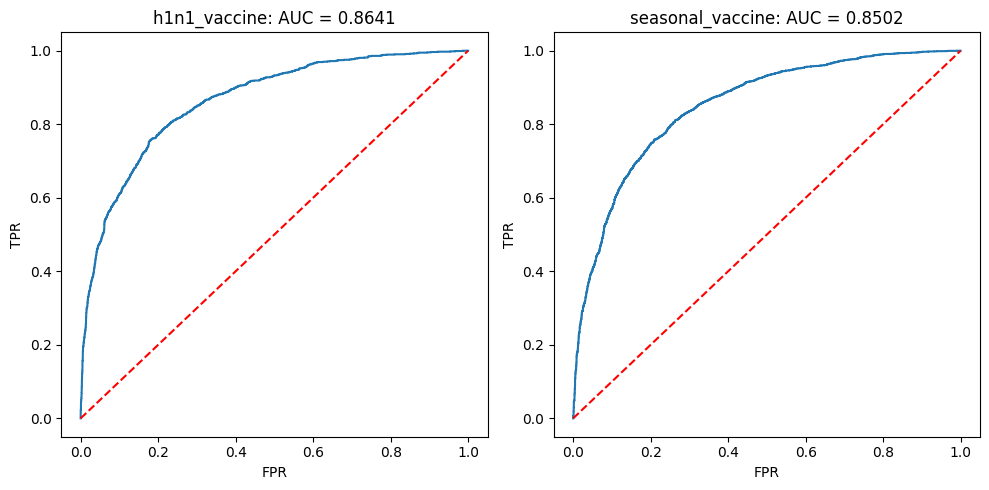

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    h1n1_y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    seasonal_y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

In [43]:
h1n1_estimators.fit(h1n1_X_train_df, training_set_labels_df)
h1n1_preds = h1n1_estimators.predict_proba(h1n1_X_test_df)
h1n1_preds

[array([[0.78345689, 0.21654311],
        [0.94609708, 0.05390292],
        [0.69158596, 0.30841404],
        ...,
        [0.81621611, 0.18378389],
        [0.93572156, 0.06427844],
        [0.41985721, 0.58014279]]),
 array([[0.5811244 , 0.4188756 ],
        [0.96812511, 0.03187489],
        [0.2537384 , 0.7462616 ],
        ...,
        [0.75008439, 0.24991561],
        [0.6042732 , 0.3957268 ],
        [0.52587626, 0.47412374]])]

In [44]:
seasonal_estimators.fit(seasonal_X_train_df, training_set_labels_df)
seasonal_preds = seasonal_estimators.predict_proba(seasonal_X_test_df)
seasonal_preds

[array([[0.79638341, 0.20361659],
        [0.96975927, 0.03024073],
        [0.72792962, 0.27207038],
        ...,
        [0.59175655, 0.40824345],
        [0.90406729, 0.09593271],
        [0.51228976, 0.48771024]]),
 array([[0.66020041, 0.33979959],
        [0.98913944, 0.01086056],
        [0.2452151 , 0.7547849 ],
        ...,
        [0.64494301, 0.35505699],
        [0.53473703, 0.46526297],
        [0.28017526, 0.71982474]])]

In [45]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=h1n1_X_test_df.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.216543,0.339800
26708,0.053903,0.010861
26709,0.308414,0.754785
26710,0.700445,0.883599
26711,0.455824,0.569967


In [46]:
y_preds.to_csv('./results/pred_random_forest_output.csv', index = True)